In [82]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import linregress
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [83]:
df = pd.read_csv("epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


## Visualize to predict sea level rise

In [88]:
def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

    # Create first line of best fit
    sns.regplot(df['Year'],
                df['CSIRO Adjusted Sea Level'],
                color='g',
                marker='o',
                label='Scatter Plot')
    lineA = linregress(df['Year'], y=df['CSIRO Adjusted Sea Level'])
    slope, intercept, r_value, p_value, std_err = lineA

    years_extended = df['Year'].append(pd.Series(range(2014, 2051)),
                                       ignore_index=True)
    plt.plot(years_extended,
             years_extended * slope + intercept,
             color="red",
             label='first line of best fit')

    # Create second line of best fit
    task = df['Year'] >= 2000
    lineB = linregress(df['Year'][task],
                       y=df['CSIRO Adjusted Sea Level'][task])

    slope, intercept, r_value, p_value, std_err = lineB

    years_reduced = years_extended[years_extended >= 2000]
    plt.plot(years_reduced,
             years_reduced * slope + intercept,
             color="blue",
             label='second line of best fit')
    plt.legend()

    # Add labels and title
    plt.title('Rise in Sea Level')
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.xticks([
        1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0,
        2075.0
    ])

    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png', dpi=100)
    # return plt.gca()

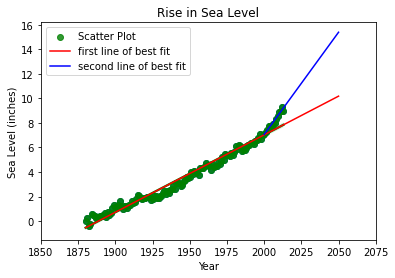

In [89]:
draw_plot()